<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.














In [0]:
# Your Work Here

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=600)

display(example)


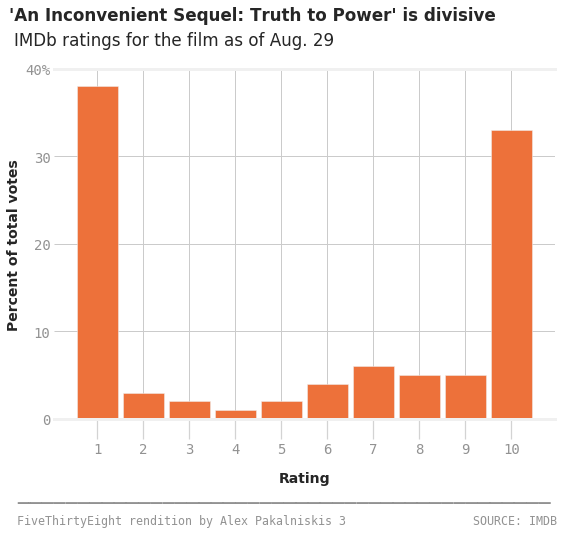

In [0]:
plt.style.use("fivethirtyeight")


fig, ax = plt.subplots(figsize=(8,6))

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax.bar(x=fake.index, height=fake,color="#ed713a", width=0.9)

fig.set_facecolor(color="None")

ax.set_facecolor(color="None")

ax.set_xlabel("Rating", fontweight="bold", size="medium")

ax.set_ylabel("Percent of total votes", fontweight="bold", size="medium")

plt.suptitle("'An Inconvenient Sequel: Truth to Power' is divisive", size="large", weight="bold", y = 1.025, x=0.425)

plt.title("IMDb ratings for the film as of Aug. 29", size="large", loc="left", y= 1.05, x=-0.08)

ax.set_xticks(range(1,11,1))
ax.set_xticklabels(list(range(1,11,1)), alpha=0.5, fontsize=14, fontname="monospace")
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=14, alpha=0.5, fontname="monospace")

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.text(x=-0.75,y=-9, s="____"*11, size="xx-large", alpha=0.5)

ax.text(x=-0.75,y=-12, s="FiveThirtyEight rendition by Alex Pakalniskis 3", size="small", alpha=0.5, fontname="monospace")
ax.text(x=11,y=-12, s="SOURCE: IMDB", size="small", alpha=0.5, ha="right", fontname="monospace")

ax.tick_params(axis='x', length=20,direction='out', bottom=True, color="lightgray")
ax.xaxis.set_label_coords(0.5, -0.15)



plt.show()

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [0]:
# Your Work Here

https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/

![visualization to replicate](https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png?w=575)

In [402]:
bob_ross_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv")

bob_ross_df.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [0]:
bob_ross_df.shape

(403, 69)

In [0]:
melted_bob_ross_df = bob_ross_df.drop(["TITLE"], axis=1).melt(id_vars="EPISODE")

melted_bob_ross_df

,EPISODE,variable,value
0,S01E01,APPLE_FRAME,0
1,S01E02,APPLE_FRAME,0
2,S01E03,APPLE_FRAME,0
3,S01E04,APPLE_FRAME,0
4,S01E05,APPLE_FRAME,0
...,...,...,...
26996,S31E09,WOOD_FRAMED,0
26997,S31E10,WOOD_FRAMED,0
26998,S31E11,WOOD_FRAMED,0
26999,S31E12,WOOD_FRAMED,0


In [0]:
topic_frequency_bob_ross_df = melted_bob_ross_df.groupby(["variable"]).sum().sort_values("value", ascending=False).reset_index()

topic_frequency_bob_ross_df

,variable,value
0,TREE,361
1,TREES,337
2,DECIDUOUS,227
3,CONIFER,212
4,CLOUDS,179
...,...,...
62,DOUBLE_OVAL_FRAME,1
63,DOCK,1
64,DIANE_ANDRE,1
65,BUILDING,1


In [0]:
topic_in_more_than_five_episodes_df = topic_frequency_bob_ross_df[topic_frequency_bob_ross_df["value"] > 5]

topic_in_more_than_five_episodes_df

,variable,value
0,TREE,361
1,TREES,337
2,DECIDUOUS,227
3,CONIFER,212
4,CLOUDS,179
5,MOUNTAIN,160
6,LAKE,143
7,GRASS,142
8,RIVER,126
9,BUSHES,120


In [0]:
number_of_episodes_where_painting_occurs = 381

topic_in_more_than_five_episodes_df["value"] / number_of_episodes_where_painting_occurs



0     0.947507
1     0.884514
2     0.595801
3     0.556430
4     0.469816
5     0.419948
6     0.375328
7     0.372703
8     0.330709
9     0.314961
10    0.286089
11    0.259843
12    0.225722
13    0.223097
14    0.202100
15    0.196850
16    0.181102
17    0.181102
18    0.139108
19    0.128609
20    0.104987
21    0.102362
22    0.099738
23    0.094488
24    0.089239
25    0.073491
26    0.070866
27    0.062992
28    0.060367
29    0.057743
30    0.047244
31    0.044619
32    0.031496
33    0.028871
34    0.028871
35    0.023622
36    0.020997
37    0.018373
Name: value, dtype: float64

In [0]:
topic_in_more_than_five_episodes_df["Percent"] = topic_in_more_than_five_episodes_df["value"] / number_of_episodes_where_painting_occurs
topic_in_more_than_five_episodes_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,variable,value,Percent
0,TREE,361,0.947507
1,TREES,337,0.884514
2,DECIDUOUS,227,0.595801
3,CONIFER,212,0.556430
4,CLOUDS,179,0.469816
5,MOUNTAIN,160,0.419948
6,LAKE,143,0.375328
7,GRASS,142,0.372703
8,RIVER,126,0.330709
9,BUSHES,120,0.314961


In [0]:
topic_in_more_than_five_episodes_df["variable"] = topic_in_more_than_five_episodes_df["variable"].str.title().str.replace("_"," ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


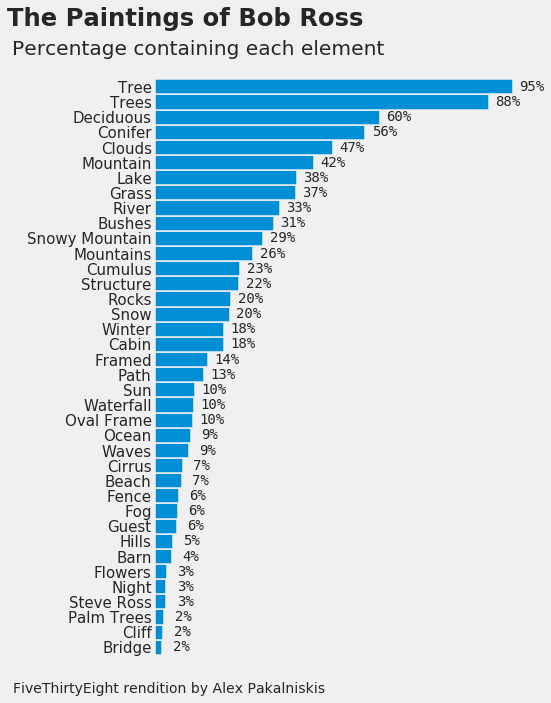

In [431]:
fig, ax = plt.subplots(figsize=(6,10))
topic_in_more_than_five_episodes_df.set_index("variable")["Percent"].sort_values().plot(kind="barh", width=1, ax=ax, lw=1.5)

plt.suptitle("The Paintings of Bob Ross", size="xx-large", weight="bold", x=0.15,y=0.975)
plt.title("Percentage containing each element", size="x-large", x=0.115,y=1.025)

ax.tick_params(axis='y', labelsize=15,color="lightgray")

ax.set_xlabel("")
ax.set_ylabel("")

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(False)

ax.set_xticklabels("")

##
total = 381


for p in ax.patches:
    width = p.get_width()*100
    plt.text(.05+p.get_width(), p.get_y()+0.5*p.get_height(),
             '{:1.0f}%'.format(width),
             ha='center', va='center', fontname="monospace")
    
plt.text(s="FiveThirtyEight rendition by Alex Pakalniskis", x=-0.375, y=-3)
plt.savefig("/bob_ross.png", dpi=300, transparent=True)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

In [433]:
thx_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv")

thx_df.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Whic

In [466]:
thx_df.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [0]:
side_dish_columns = thx_df.columns[thx_df.columns.str.contains("side dish")].to_list()

In [470]:
side_dish_columns

['Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni a

In [0]:
cleaned_side_dishes_list = thx_df[side_dish_columns].columns.str.split("Please select all that apply. - ").str[1].tolist()

In [481]:
cleaned_side_dishes_list

['Brussel sprouts',
 'Carrots',
 'Cauliflower',
 'Corn',
 'Cornbread',
 'Fruit salad',
 'Green beans/green bean casserole',
 'Macaroni and cheese',
 'Mashed potatoes',
 'Rolls/biscuits',
 'Squash',
 'Vegetable salad',
 'Yams/sweet potato casserole',
 'Other (please specify)',
 'Other (please specify).1']

In [489]:
sides_df = thx_df[side_dish_columns].copy()

sides_df

,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1
0,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Asian vinagrette salad
2,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,NaN,NaN
3,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
4,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,NaN,NaN,NaN,NaN,NaN,NaN,Green beans/green bean casserole,NaN,Mashed potatoes,Rolls/biscuits,Squash,NaN,Yams/sweet potato casserole,NaN,NaN
1054,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,NaN,Mashed potatoes,Rolls/biscuits,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1056,NaN,NaN,NaN,NaN,NaN,Fruit salad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
sides_df.columns = sides_df.columns.str.split("Please select all that apply. - ").str[1]

sides_df

,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Other (please specify).1
0,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Asian vinagrette salad
2,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,NaN,NaN
3,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
4,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,NaN,NaN,NaN,NaN,NaN,NaN,Green beans/green bean casserole,NaN,Mashed potatoes,Rolls/biscuits,Squash,NaN,Yams/sweet potato casserole,NaN,NaN
1054,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,NaN,Mashed potatoes,Rolls/biscuits,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN
1056,NaN,NaN,NaN,NaN,NaN,Fruit salad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [495]:
sides_df.count().sort_values(ascending=False)

Mashed potatoes                     817
Rolls/biscuits                      766
Green beans/green bean casserole    686
Yams/sweet potato casserole         631
Corn                                464
Carrots                             242
Cornbread                           235
Fruit salad                         215
Vegetable salad                     209
Macaroni and cheese                 206
Squash                              171
Brussel sprouts                     155
Other (please specify).1            111
Other (please specify)              111
Cauliflower                          88
dtype: int64

In [497]:
sides_df["US Region"] = thx_df["US Region"].copy()

sides_df

,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Other (please specify).1,US Region
0,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN,Middle Atlantic
1,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Asian vinagrette salad,East South Central
2,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,NaN,NaN,Mountain
3,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,NaN,NaN,Pacific
4,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,NaN,NaN,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,NaN,NaN,NaN,NaN,NaN,NaN,Green beans/green bean casserole,NaN,Mashed potatoes,Rolls/biscuits,Squash,NaN,Yams/sweet potato casserole,NaN,NaN,Mountain
1054,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,NaN,Mashed potatoes,Rolls/biscuits,NaN,NaN,Yams/sweet potato casserole,NaN,NaN,Pacific
1055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yams/sweet potato casserole,NaN,NaN,Pacific
1056,NaN,NaN,NaN,NaN,NaN,Fruit salad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [501]:
sides_df.groupby("US Region").count()

,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,Other (please specify),Other (please specify).1
US Region,,,,,,,,,,,,,,,
East North Central,22,28,13,76,23,20,103,21,127,123,15,26,90,17,17
East South Central,7,15,5,31,16,20,49,21,45,49,12,8,44,10,10
Middle Atlantic,41,45,25,77,33,26,92,20,130,106,44,33,99,16,16
Mountain,6,11,4,17,10,11,31,3,38,33,5,12,26,5,5
New England,12,25,4,22,10,5,33,6,52,41,31,11,34,7,7
Pacific,29,30,18,55,37,35,84,18,112,99,17,39,85,13,13
South Atlantic,27,48,11,96,53,39,150,79,157,158,31,39,144,27,27
West North Central,3,12,3,36,12,18,60,12,65,62,2,15,33,5,5
West South Central,4,21,3,46,34,30,66,20,70,73,8,15,63,10,10


In [437]:
!wget https://raw.githubusercontent.com/alex-pakalniskis/geoColaboratory/master/geoColaboratory.sh

--2020-02-13 23:37:39--  https://raw.githubusercontent.com/alex-pakalniskis/geoColaboratory/master/geoColaboratory.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1020 [text/plain]
Saving to: ‘geoColaboratory.sh’

geoColaboratory.sh  100%[===================>]    1020  --.-KB/s    in 0s      

2020-02-13 23:37:39 (344 MB/s) - ‘geoColaboratory.sh’ saved [1020/1020]



In [438]:
!bash geoColaboratory.sh

Installing GIS libraries
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [83.1 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://archive.ubuntu.com/ubuntu

In [0]:
import geopandas as gpd

In [442]:
thx_df["US Region"].value_counts(dropna=False)

South Atlantic        214
Middle Atlantic       159
East North Central    150
Pacific               146
West South Central     91
West North Central     74
East South Central     60
NaN                    59
New England            58
Mountain               47
Name: US Region, dtype: int64

In [462]:
!wget https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip

--2020-02-13 23:55:29--  https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip
Resolving www2.census.gov (www2.census.gov)... 104.91.176.162, 2600:1409:d000:5a9::208c, 2600:1409:d000:5a5::208c
Connecting to www2.census.gov (www2.census.gov)|104.91.176.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2018_us_state_20m.zip’

cb_2018_us_state_20     [ <=>                ] 186.74K  --.-KB/s    in 0.06s   

2020-02-13 23:55:30 (3.12 MB/s) - ‘cb_2018_us_state_20m.zip’ saved [191218]



In [463]:
!unzip cb_2018_us_state_20m.zip

Archive:  cb_2018_us_state_20m.zip
  inflating: cb_2018_us_state_20m.shp.ea.iso.xml  
  inflating: cb_2018_us_state_20m.shp.iso.xml  
  inflating: cb_2018_us_state_20m.shp  
  inflating: cb_2018_us_state_20m.shx  
  inflating: cb_2018_us_state_20m.dbf  
  inflating: cb_2018_us_state_20m.prj  
 extracting: cb_2018_us_state_20m.cpg  


In [0]:
gdf = gpd.read_file("cb_2018_us_state_20m.shp")

In [465]:
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [455]:
gdf[["NAME","geometry"]]

,NAME,geometry
0,New England,"MULTIPOLYGON (((-68.92401 43.88541, -68.87478 ..."
1,Middle Atlantic,"MULTIPOLYGON (((-72.01893 41.27411, -71.92680 ..."
2,East North Central,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
3,West North Central,"POLYGON ((-104.05770 44.99743, -104.03914 44.9..."
4,South Atlantic,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
5,East South Central,"POLYGON ((-91.62136 31.26781, -91.56419 31.261..."
6,West South Central,"POLYGON ((-106.62345 31.91403, -106.63011 31.9..."
7,Mountain,"POLYGON ((-120.00480 39.31648, -120.00303 39.4..."
8,Pacific,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."


In [456]:
thx_df["US Region"]

0          Middle Atlantic
1       East South Central
2                 Mountain
3                  Pacific
4                  Pacific
               ...        
1053              Mountain
1054               Pacific
1055               Pacific
1056                   NaN
1057                   NaN
Name: US Region, Length: 1058, dtype: object

In [459]:
thx_df.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

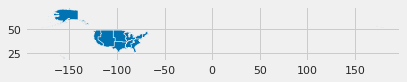

In [460]:
gdf[["NAME","geometry"]].plot()



### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here